# Visualizing Chemical Elements Properties

Not a subject matter expert but this is an attempt to practive a bit of visualisation using matplotlib. 
I stumbled across this data in a collaboration chat that I am part of and found very interesting.

In [1]:
#Import packages 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
atomic = pd.read_csv('Atomic.csv',sep=';') 
#Interesting that the file has a ';' for separation

In [3]:
# Inspect first 5 rows
atomic.head() 

,Unnamed: 0,melting point [K],boiling point [K],atomic radius [pm],covalent radius [pm],specific volume [cm3],specific heat [J/(Kg K)],thermal conductivity [W/(m k)],Pauling electronegativity [Pauling scale],first ionisation energy [kJ/mol],lattice constant [pm]
0,H,14.01,20.28,25,31,11.42,14300.0,0.18,2.20,1312.0,470.00
1,Li,453.69,1615.00,145,128,13.02,3570.0,85.00,0.98,520.2,531.00
2,Be,1560.00,2742.00,105,96,4.85,1820.0,190.00,1.57,899.5,228.58
3,B,2349.00,4200.00,85,84,4.39,1039.0,27.00,2.04,800.6,506.00
4,C,3800.00,4300.00,70,76,5.29,710.0,140.00,2.55,1086.5,246.40


Noticed that the column index 0 is unnamed. Let's fix it

In [4]:
# check columns
atomic.columns 

Index(['Unnamed: 0', 'melting point [K]', 'boiling point [K]',
       'atomic radius [pm]', 'covalent radius [pm]', 'specific volume [cm3]',
       'specific heat [J/(Kg K)]', 'thermal conductivity [W/(m k)]',
       'Pauling electronegativity [Pauling scale]',
       'first ionisation energy [kJ/mol]', ' lattice constant [pm]'],
      dtype='object')

In [5]:
atomic= atomic.rename(index=str, columns={"Unnamed: 0": "Chemical"})


In [6]:
# check again
atomic.columns 

Index(['Chemical', 'melting point [K]', 'boiling point [K]',
       'atomic radius [pm]', 'covalent radius [pm]', 'specific volume [cm3]',
       'specific heat [J/(Kg K)]', 'thermal conductivity [W/(m k)]',
       'Pauling electronegativity [Pauling scale]',
       'first ionisation energy [kJ/mol]', ' lattice constant [pm]'],
      dtype='object')

In [7]:
# inspect column type and missing values
atomic.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 80
Data columns (total 11 columns):
Chemical                                     81 non-null object
melting point [K]                            81 non-null float64
boiling point [K]                            81 non-null float64
atomic radius [pm]                           81 non-null int64
covalent radius [pm]                         81 non-null int64
specific volume [cm3]                        81 non-null float64
specific heat [J/(Kg K)]                     81 non-null float64
thermal conductivity [W/(m k)]               81 non-null float64
Pauling electronegativity [Pauling scale]    81 non-null float64
first ionisation energy [kJ/mol]             81 non-null float64
 lattice constant [pm]                       81 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 7.6+ KB


WOW! there is not missing values and most of the fields are numeric except the Chemical element symbol name

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116032fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119764ac8>]], dtype=object)

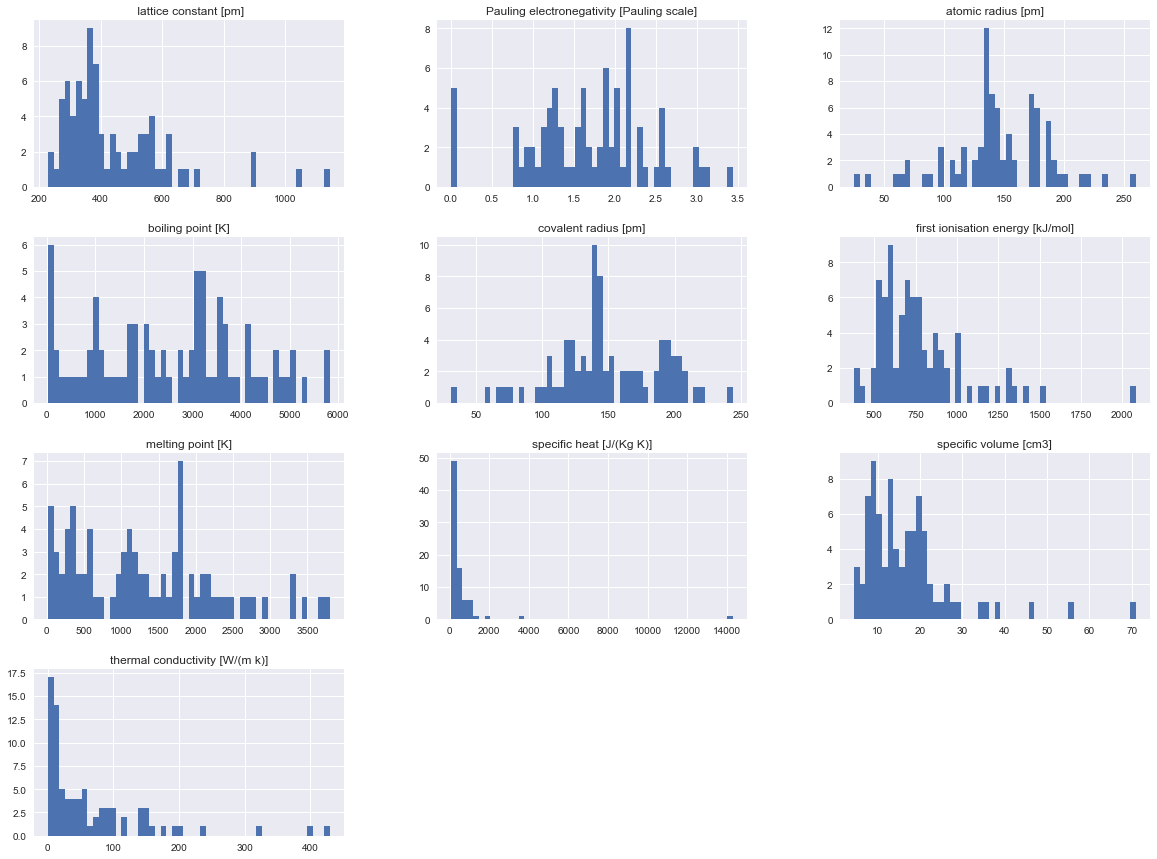

In [8]:
# plot a histogram for all.
atomic.hist(bins=50,figsize=(20,15))

# pandas and pyplot are automatically clever enough to ingnore the num numerical columns



interesting 🤔! I know bolocks about chemistry. I was not too bad at school but for sure not the best. But just by looking at the histogram we can see some interesting things...

Covalent Radius and Atomic Radius are the properties that looks the most normally distributed and the others have long tails and are more "random"

Let's check for correlation

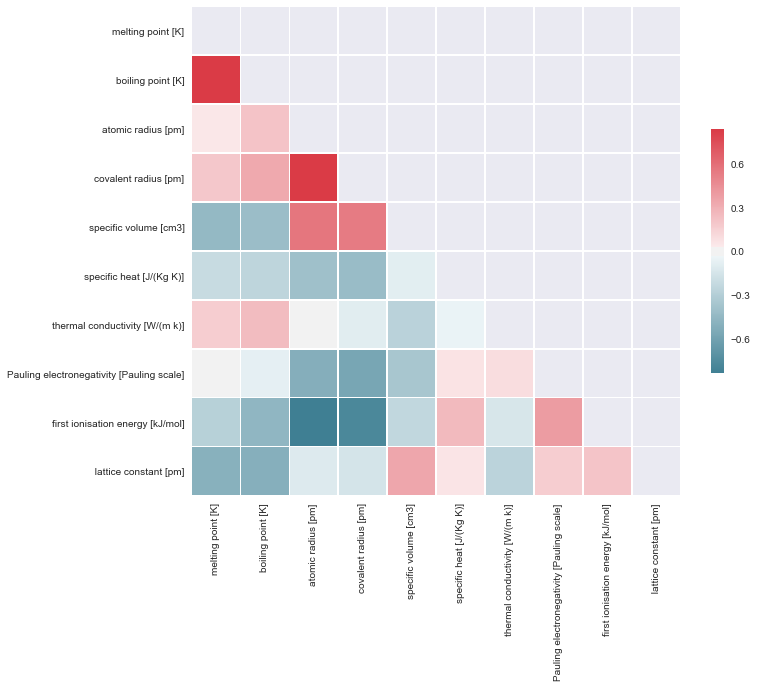

In [9]:
# Compute the correlation matrix
corr = atomic.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

"An image is not only better than a thousand words but is also better than a data table with lots of numbers" Anonymous

From the correlation heatmap above what are interestint correlations are

boiling point [K] and melting point [K] are highly correlated and this would make sense as they are bothe achieved if heat is applied to the element 

Again covalent radius [pm] and atomic radius [pm] seems to walk hand in hand as we could observe in the histogram

Another interesting point are the invese correlations

first ionisation energy [kJ/mol] and atomic radius [pm] are highly inverse correlated and same happens with covalent radius [pm]

Surprise that thermal conductivity [W/(m k)] is not too highly correlated to melting and boiling point



In [10]:
# print the corr matrix
corr

,melting point [K],boiling point [K],atomic radius [pm],covalent radius [pm],specific volume [cm3],specific heat [J/(Kg K)],thermal conductivity [W/(m k)],Pauling electronegativity [Pauling scale],first ionisation energy [kJ/mol],lattice constant [pm]
melting point [K],1.000000,0.848481,0.050749,0.195630,-0.444940,-0.216200,0.168217,0.007243,-0.284426,-0.500451
boiling point [K],0.848481,1.000000,0.212331,0.334227,-0.417798,-0.253496,0.245905,-0.078565,-0.460164,-0.510852
atomic radius [pm],0.050749,0.212331,1.000000,0.928976,0.569630,-0.397055,0.002377,-0.516121,-0.840482,-0.106822
covalent radius [pm],0.195630,0.334227,0.928976,1.000000,0.543769,-0.424215,-0.094249,-0.573161,-0.777979,-0.153076
specific volume [cm3],-0.444940,-0.417798,0.569630,0.543769,1.000000,-0.086024,-0.273763,-0.355465,-0.237771,0.346573
specific heat [J/(Kg K)],-0.216200,-0.253496,-0.397055,-0.424215,-0.086024,1.000000,-0.051353,0.066447,0.250637,0.060684
thermal conductivity [W/(m k)],0.168217,0.245905,0.002377,-0.094249,-0.273763,-0.051353,1.000000,0.095161,-0.140275,-0.263871
Pauling electronegativity [Pauling scale],0.007243,-0.078565,-0.516121,-0.573161,-0.355465,0.066447,0.095161,1.000000,0.393460,0.168760
first ionisation energy [kJ/mol],-0.284426,-0.460164,-0.840482,-0.777979,-0.237771,0.250637,-0.140275,0.393460,1.000000,0.204937
lattice constant [pm],-0.500451,-0.510852,-0.106822,-0.153076,0.346573,0.060684,-0.263871,0.168760,0.204937,1.000000


Finally I would like to do a final plot to compare Boiling and Melting point and find why some elements this correlation is not very strong

Finally I would like to do a final plot to compare Boiling and Melting point and find why some elements this correlation is not very strong

(0.6, 3989.310946818201)

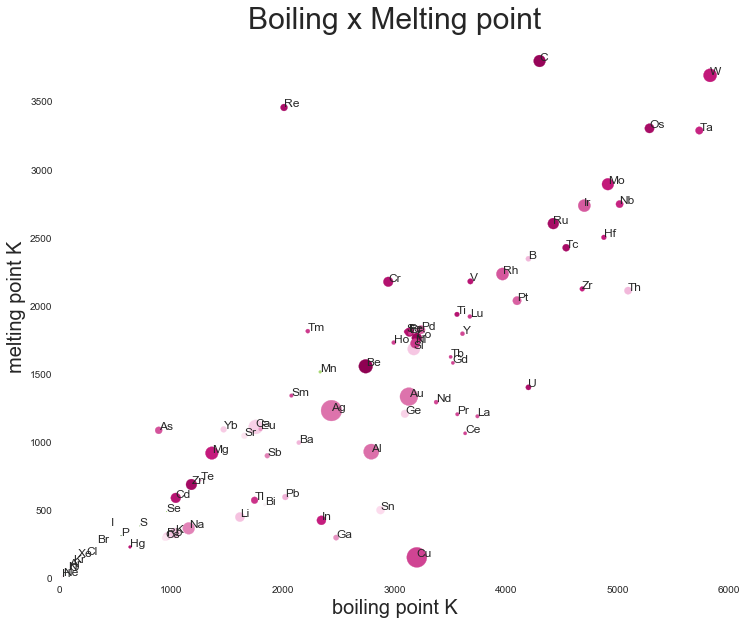

In [12]:

# Chart figure and axis
fig, ax = plt.subplots(figsize=(12,10))

# Set Background
ax.set_facecolor("white")

# Set Style
plt.style.use('seaborn')

# Plotting Scatter
ax.scatter(x=x,y=y,s=size,c=color,cmap='PiYG')

# Label datapints
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]),fontsize=12)

# Insert Labels and adjusting Axis Limits    
plt.xlabel('boiling point K', fontsize=20)
plt.ylabel('melting point K',fontsize=20)
plt.title('Boiling x Melting point',fontsize=30)
plt.xlim(0,6000)
plt.ylim(0.6000)

Most of the elements could nicely fit in a line where boiing and melting points grow together.

The outliers are Cu,Re and C

They are

Cu = Copper
Re = Rhenium
C = Carbon



In [13]:

atomic2=atomic.set_index('Chemical')
outliers=['Cu','Re','C']
columns=['boiling point [K]','melting point [K]','thermal conductivity [W/(m k)]',' lattice constant [pm]']
atomic2.loc[outliers,columns]


,boiling point [K],melting point [K],thermal conductivity [W/(m k)],lattice constant [pm]
Chemical,,,,
Cu,3200.0,157.77,400.0,361.49
Re,2010.0,3459.00,48.0,276.10
C,4300.0,3800.00,140.0,246.40


In [14]:
atomic2.describe()[columns]

,boiling point [K],melting point [K],thermal conductivity [W/(m k)],lattice constant [pm]
count,81.000000,81.000000,81.000000,81.000000
mean,2540.179012,1319.117531,65.602099,440.660741
std,1555.397659,959.877796,84.303810,173.006380
min,20.280000,14.010000,0.010000,228.580000
25%,1180.000000,453.690000,13.000000,325.230000
50%,2742.000000,1208.000000,34.900000,380.340000
75%,3609.000000,1828.050000,91.000000,531.000000
max,5828.000000,3800.000000,430.000000,1145.000000


Interesting that for Rhenium the melting point is higher than the boiling point. I am not a chemical engineer but is it possible?

Interesting Enough Copper melts very easily but it is "hard" to boil

Wil double check the facts on this webpage https://www.lenntech.com/periodic/name/alphabetic.htm

Sure enough looks like the data is wrong

for Rhenium in Celcius

Melting point

3170 °C

Boiling point

5627 °C



Read more: https://www.lenntech.com/periodic/elements/re.htm#ixzz5rWg6NH5T

In [15]:
# Concert C to K
def Celsius_to_Kelvin(C): 
    return (C + 273.15) 

In [18]:
atomic2['melting point [C]']=atomic2['melting point [K]'].apply(Celsius_to_Kelvin)
atomic2['boiling point [C]']=atomic2['boiling point [K]'].apply(Celsius_to_Kelvin)

In [19]:
columns=['boiling point [K]','boiling point [C]','melting point [K]','melting point [C]']

In [20]:
atomic2.loc[outliers,columns]

,boiling point [K],boiling point [C],melting point [K],melting point [C]
Chemical,,,,
Cu,3200.0,3473.15,157.77,430.92
Re,2010.0,2283.15,3459.00,3732.15
C,4300.0,4573.15,3800.00,4073.15


As a data scientist not always believe in the data you see out there... people make mistakes

The data for Melting point looks correct but definitively boiling point is looking a bit fishy

In [23]:
# find where the data looks fishy

atomic[atomic['boiling point [K]']<atomic['melting point [K]']]

,Chemical,melting point [K],boiling point [K],atomic radius [pm],covalent radius [pm],specific volume [cm3],specific heat [J/(Kg K)],thermal conductivity [W/(m k)],Pauling electronegativity [Pauling scale],first ionisation energy [kJ/mol],lattice constant [pm]
30,As,1090.0,887.0,115,119,12.95,328.0,50.0,2.18,947.0,375.98
70,Re,3459.0,2010.0,135,151,8.86,137.0,48.0,1.90,760.0,276.10


Suggestion for next step is to scrape the data from https://www.lenntech.com/periodic/name/alphabetic.htm and redo the analysis 